In [65]:
import sys, os, importlib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import src.portfolio_tracker.io as io
importlib.reload(io)                # reloads code from disk
from src.portfolio_tracker.io import load_holdings, fetch_prices


In [66]:
from pathlib import Path
from src.portfolio_tracker.io import load_holdings

csv_path = Path("../data/sample_holdings.csv").resolve()
print(csv_path)
holdings = load_holdings(str(csv_path))
holdings


/files/capstone_project_LB/data/sample_holdings.csv


,account_id,asset_id,asset_type,ticker,currency,quantity,avg_cost
0,acc1,asset_equity,Equity,AAPL,USD,10.00,150
1,acc1,asset_etf,ETF,SPY,USD,5.00,400
2,acc1,asset_crypto,Crypto,BTC-USD,USD,0.02,35000


Failed to get ticker 'BTC-USD' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'SPY' reason: Expecting value: line 1 column 1 (char 0)

3 Failed downloads:
['BTC-USD', 'AAPL', 'SPY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Tickers: ['AAPL', 'SPY', 'BTC-USD']
⚠️ Yahoo download failed; generating synthetic prices for offline use.
Prices shape: (746, 3)


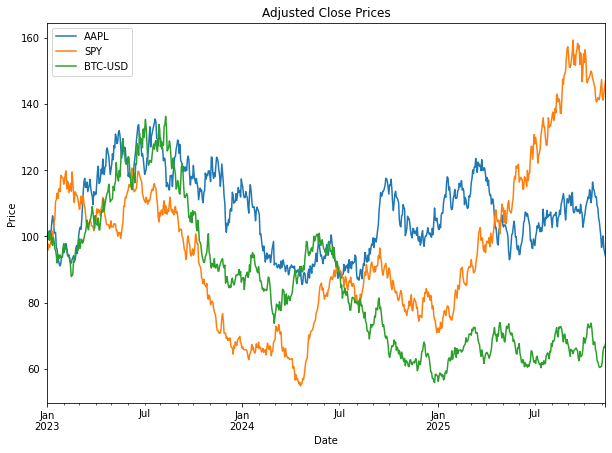

In [79]:

tickers = holdings["ticker"].astype(str)
print("Tickers:", tickers.tolist())
prices = fetch_prices(tickers, start="2023-01-01")
prices.head()


print("Prices shape:", prices.shape)
ax = prices.ffill().plot(figsize=(10,7))
ax.set_title("Adjusted Close Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.show()


Prices shape: (746, 3)


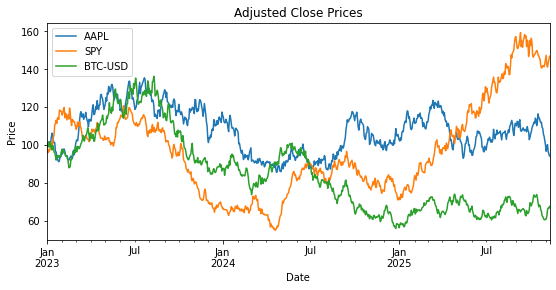

In [68]:
print("Prices shape:", prices.shape)

import matplotlib.pyplot as plt
ax = prices.ffill().plot(figsize=(9,4))
ax.set_title("Adjusted Close Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.show()


In [70]:
import importlib, src.portfolio_tracker.transform as tf
importlib.reload(tf)
from src.portfolio_tracker.transform import daily_returns, portfolio_returns


In [71]:
rets = daily_returns(prices)
display(rets.head())
print("Returns shape:", rets.shape, "| median abs mean:", rets.mean().abs().median())


,AAPL,SPY,BTC-USD
date,,,
2023-01-03,-0.002140,-0.028037,-0.016434
2023-01-04,0.013397,0.015710,0.025265
2023-01-05,0.002601,-0.007390,-0.026339
2023-01-06,-0.010161,0.009912,0.020421
2023-01-09,0.007762,0.011096,0.000173


Returns shape: (745, 3) | median abs mean: 0.00032619127698630383


date
2025-11-04    1.187841
2025-11-05    1.193106
2025-11-06    1.169254
2025-11-07    1.164532
2025-11-10    1.160002
Freq: B, Name: portfolio, dtype: float64

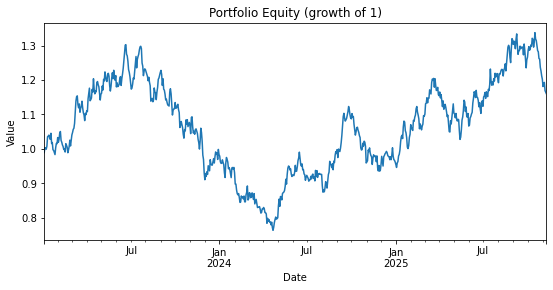

In [72]:
port_ret = portfolio_returns(holdings, prices)
equity = (1 + port_ret).cumprod()
display(equity.tail())

import matplotlib.pyplot as plt
equity.plot(figsize=(9,4))
plt.title("Portfolio Equity (growth of 1)")
plt.xlabel("Date"); plt.ylabel("Value")
plt.show()


In [73]:
import importlib, src.portfolio_tracker.kpis as kp
importlib.reload(kp)
from src.portfolio_tracker.kpis import kpi_table, drawdown

kpi_table(port_ret).style.format("{:.4f}")



,Cumulative Return,Ann. Vol,Sharpe,Max Drawdown
0,0.1600,0.2410,0.3288,-0.4139


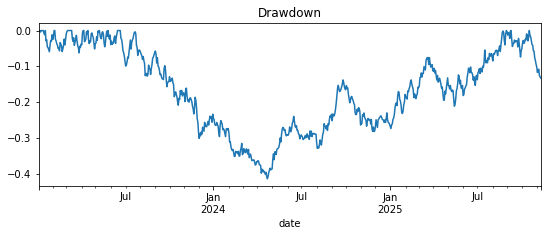

In [74]:
dd = drawdown((1+port_ret).cumprod())
dd.plot(figsize=(9,3))
plt.title("Drawdown")
plt.show()
